# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

*Note: Business Context, Objective, and Data Dictionary taken from the problem statement.*

### Business Context

The evolution of news sourcing thanks to the democratization and speeding up of the access to information that the Internet brought has seen some types of traditional media decline in favor of various online sources, like streaming, podcasts, video content services, social media, and e-news sites.

In this highly competitive and constantly changing business environment, e-news sites, being sort of heirs of the old newspaper media, face the challenge of keeping up with the instantaneousness and decentralized nature of social media by offering easy to access, interesting, valuable and visually attractive content to its users. The best-known sources of revenue for these companies are subscriptions and sponsorships (ads) can be counted. Other sources can be cross-selling, data commercialization, events, among others.

**E-News Express** is an e-news company that wants to grow up its business by expanding its pool of subscribers, but has seen an apparent decline in subscriber growth relative to last year performance. Executives believe the decline is caused because the webpage design is not interesting enough to drive more engagement from its users.

### Objective

As a response to the perceived decline in engagement, the company has come up with a new landing page, sporting a new layout and design, and more interesting content, and needs to corroborate its effectiveness in driving better engagement and ultimately, revenue for E-News Express.

With that objective in mind, the Data Science team designed and conducted an experiment by selecting a random sample of 100 users divided equally between the old page and the new one. Also, the samples have almost equal representation each of three language preferences (English, Spanish and French). The dependent variables are:
* Time spent on the page
* If the user gets converted to subscription user or not

In order to complete the experiment, the task at hand consists in analyzing the data gathered and answering some questions related to the effectiveness of the new landing page relative to revenue-generating metrics:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

To answer these questions, some statistical tests are called for, and the significance level determined for these is $\alpha$ = 5%.

*Questions source: problem statement*

### Data Dictionary

The dataset provided for the task requested consists of a recollection from a survey of 100 users, and contains the following variables:

* user_id - Unique user ID of the person visiting the website
* group - Whether the user belongs to the first group (control) or the second group (treatment)
* landing_page - Whether the landing page is new landing page or the old one
* time_spent_on_the_page - Time (in minutes) spent by the user on the landing page served
* converted - Whether the user gets converted to a subscriber of the news portal or not
* language_preferred - Language chosen by the user to view the landing page

*Dictionary source: problem statement*

## Import all the necessary libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn aesthethic settings. Source: https://seaborn.pydata.org/examples/ (seaborn example gallery)
sns.set_theme(style='darkgrid')

# "Magic" command to tell Python to actually display the graphs (sourced from cases and session notebooks)
%matplotlib inline

# Option to display values up to 2 decimal places (sourced from cases and session notebooks)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# import libraries for statistical analyses
import scipy.stats as stats
import statsmodels.stats.proportion as proportion

## Reading the Data into a DataFrame

In [2]:
# read the data
# Comment: this notebook was run on Jupyter. If this code is run on Colab, the following file path has to be edited accordingly.
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
df.head() # first 5 rows of the data set.

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.tail() # last 5 rows of the data set.

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.') # shape of the data set (rows, columns)

The dataset has 100 rows and 6 columns.


In [6]:
df.info() # summary of structure of the data set and dataypes, quantity of null values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [7]:
df.describe(include = 'all').T # statistical summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.00,NaN,NaN,NaN,546517.00,52.30,546443.00,546467.75,546492.50,546567.25,546592.00
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.00,NaN,NaN,NaN,5.38,2.38,0.19,3.88,5.42,7.02,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isna().sum() # checking for nulls

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [9]:
df.drop_duplicates().shape == df.shape # checking for duplicate rows. True = no duplicates.

True

**Observations about the data:**

* No apparent issues with the data types. The user ID is interpreted as an integer, while the rest of the categorical variables are expressed as strings. The only numerical variable, time spent on the page, being a continuous numerical value, is expressed as a float.
* For the analysis purposes, the "group" and "landing_page" columns seem to be redundant. The control group is shown the old landing page, apparently.
* Overall, the time spent on the page ranges between 0.19 and 10.71 minutes, with an average of 5.38 minutes, very close to the median of 5.42 minutes so apparently there's no skewness in the distribution. 50% of the data ranges between 3.88 and 7.02 minutes (IQR).
* 54% of the whole group of users were converted.
* The dataset has 100 records (rows) with no duplicates or null values.

### Auxiliary parameters and functions

First, let's define some parameters and auxiliary functions that will help streamline the analyses ahead.

In [10]:
# significance level for all tests, unless explicitly stated
alpha = 0.05

# auxiliary function to express the result of any test
def h_0_rej(p, a):
    if p < a:
        txt = ''
    else:
        txt = 'not '
    print (f'P-value = {p}\nSignificance level = {a}\nThe p-value is {txt}less than the significance level.\nConsequently, the null hypothesis is {txt}rejected.')

### Univariate Analysis

Note: Not every data column seem to merit a plot visualization to get enough understanding of its behavior; plots will be reserved for some cases, for a tidier, less crowded presentation.

#### User ID:

In [11]:
df['user_id'].unique().shape[0] # number of unique user ID's

100

**Observation:**
There are no duplicated user ID's, which could've invalidated some data points.

#### Group:

In [12]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

**Observation:**
The group is evenly split (50/50) between the control and treatment group.

#### Landing Page:

In [13]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

**Observation:**
The group is evenly split (50/50) between the old and new landing page (overlapped with the 'group' column).

#### Converted:

In [14]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

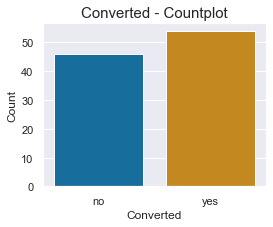

In [15]:
plt.figure(figsize=(4,3))
sns.countplot(data = df, 
             x = 'converted', 
             palette = 'colorblind')

plt.title('Converted - Countplot', fontsize = 15)
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()

**Observation:**
54% of users got converted overall.

#### Language Preferred:

In [16]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

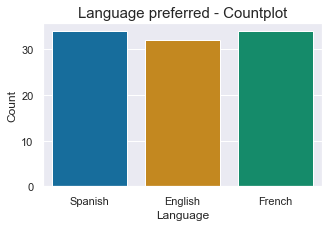

In [17]:
plt.figure(figsize=(5,3))
sns.countplot(data = df, 
             x = 'language_preferred', 
             palette = 'colorblind')

plt.title('Language preferred - Countplot', fontsize = 15)
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

**Observation:**
The sample is almost equally distributed among the three preferred languages (Spanish, English and French).

#### Time Spent on the Page:

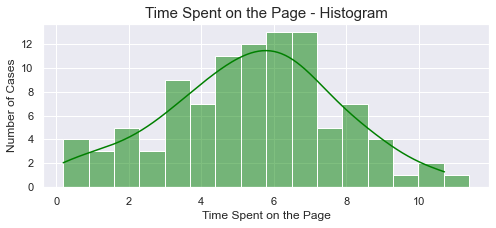

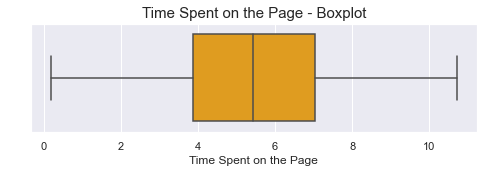

In [18]:
plt.figure(figsize=(8,3))
sns.histplot(data = df, 
             x = 'time_spent_on_the_page', 
             color = 'green', 
             binwidth = 0.7,
             kde = True)
plt.title('Time Spent on the Page - Histogram', fontsize = 15)
plt.ylabel('Number of Cases')
plt.xlabel('Time Spent on the Page')
plt.show()

plt.figure(figsize=(8,2))
sns.boxplot(data = df, 
            x = 'time_spent_on_the_page', 
            color = 'orange')
plt.title('Time Spent on the Page - Boxplot', fontsize = 15)
plt.ylabel(' ')
plt.xlabel('Time Spent on the Page')
plt.show()

**Observation:**
The time spent on the page looks normally distributed, with very little or no skewness and no extreme values. A Shapiro-Wilk test (at 5% of significance level) will be conducted on this data to check if it can be assumed to be normally distributed:

$H_0$: the data is normally distributed.

$H_a$: the data is not normally distributed.

In [19]:
# Shapiro-Wilk test
stat, p = stats.shapiro(df['time_spent_on_the_page'])
print ('Shapiro-Wilk\'s test results:')
h_0_rej(p, alpha)

Shapiro-Wilk's test results:
P-value = 0.5643684267997742
Significance level = 0.05
The p-value is not less than the significance level.
Consequently, the null hypothesis is not rejected.


**Observation 2:**
For testing purposes, it can be assumed that the data in this column is normally distributed.

### Bivariate Analysis

#### Landing page vs Group:

First, let's confirm the overlapping of 'control' and 'landing_page' data, so further redundant analyses are avoided:

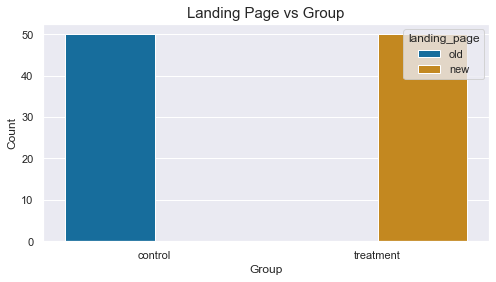

In [20]:
plt.figure(figsize=(8, 4))
sns.countplot(data = df, 
            x = 'group', 
            hue = 'landing_page', 
            palette = 'colorblind', 
           )
plt.title('Landing Page vs Group', fontsize = 15)
plt.ylabel('Count')
plt.xlabel('Group')
plt.show()

In [21]:
df.groupby(['group', 'landing_page'])['group'].count()

group      landing_page
control    old             50
treatment  new             50
Name: group, dtype: int64

**Observation:**
As can be seen from the grouping of data and the visualization, both data columns are effectively redundant. The 'control' column will be ignored from now on.

#### Landing Page vs Time Spent on the Page:

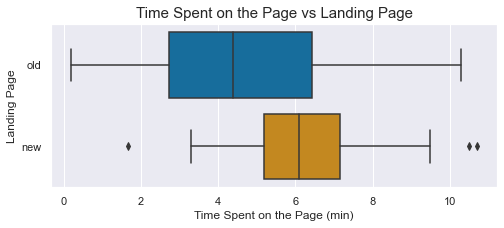

In [22]:
plt.figure(figsize=(8, 3))
sns.boxplot(data = df, 
            x = 'time_spent_on_the_page', 
            y = 'landing_page', 
            palette = 'colorblind', 
           )
plt.title('Time Spent on the Page vs Landing Page', fontsize = 15)
plt.ylabel('Landing Page')
plt.xlabel('Time Spent on the Page (min)')
plt.show()

**Observation:**
The former box plot shows that the time spent on the new page is higher than for the old page for the samples taken. The median for the new page is higher than the median for the old page. At least half the old page sample has lower values than at least 75% of the new page sample (comparing P50 of the old page sample with P25 of the new page sample). Further testing ahead in this document will tell if this difference is significant enough to infer something about the underlying population.

#### Converted vs Time Spent on the Page:

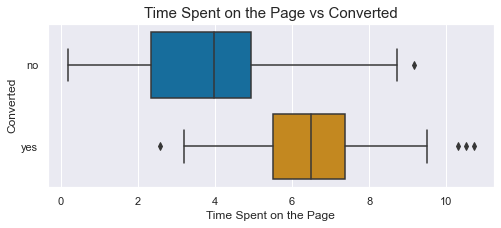

In [23]:
plt.figure(figsize=(8, 3))
sns.boxplot(data = df, 
            x = 'time_spent_on_the_page', 
            y = 'converted', 
            palette = 'colorblind', 
           )
plt.title('Time Spent on the Page vs Converted', fontsize = 15)
plt.ylabel('Converted')
plt.xlabel('Time Spent on the Page')
plt.show()

**Observation:**
The former box plot shows that, the time spent on the page is higher for converted users than for non-converted users in the sample taken. Let's add the distinction between old and new landing page:

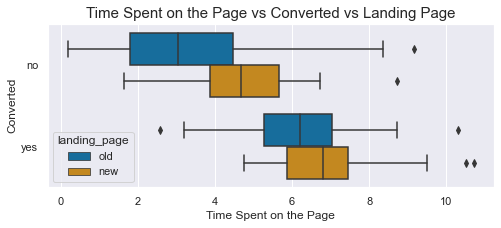

In [24]:
plt.figure(figsize=(8, 3))
sns.boxplot(data = df, 
            x = 'time_spent_on_the_page', 
            y = 'converted', 
            hue = 'landing_page',
            palette = 'colorblind', 
           )
plt.title('Time Spent on the Page vs Converted vs Landing Page', fontsize = 15)
plt.ylabel('Converted')
plt.xlabel('Time Spent on the Page')
plt.show()

**Observation:**
The former box plot shows that, for both groups of the sample (converted and non-converted), the time spent on the page is higher for the new page than for the old page.

These visualizations hint at a relationship between the **landing page** and the **converted** status for the sampled users:

#### Landing page vs Converted status:

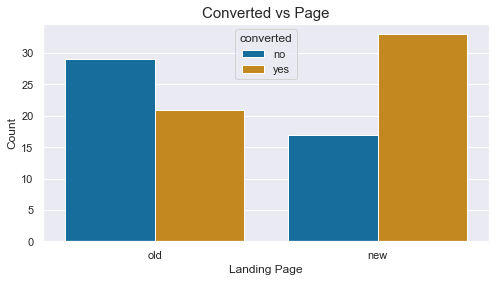

In [25]:
plt.figure(figsize=(8, 4))
sns.countplot(data = df, 
            x = 'landing_page', 
            hue = 'converted', 
            palette = 'colorblind', 
           )
plt.title('Converted vs Page', fontsize = 15)
plt.ylabel('Count')
plt.xlabel('Landing Page')
plt.show()

**Observation:**
The former count plot shows that the number of converted users is higher for the new page sample than for the old page one. Given that the size of each sample for the old and new page are equal, this also means that the relative quantity (proportion) of conversion for the sample of the new page users is also higher. This relationship will be explored further in one of the statistical tests ahead.

#### Language Preferred vs Time Spent on the Page:

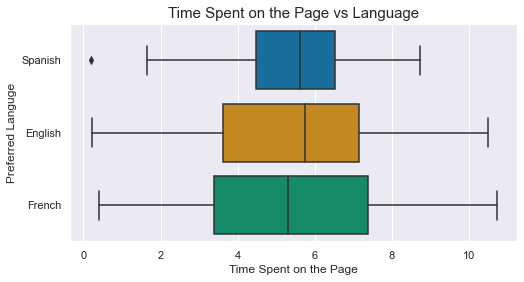

In [26]:
plt.figure(figsize=(8, 4))
sns.boxplot(data = df, 
            x = 'time_spent_on_the_page', 
            y = 'language_preferred', 
            palette = 'colorblind', 
           )
plt.title('Time Spent on the Page vs Language', fontsize = 15)
plt.ylabel('Preferred Languge')
plt.xlabel('Time Spent on the Page')
plt.show()

**Observation:** The distribution of the variable Time Spent on the Page doesn't seem to change much across the Language preferred variable. Spanish-preferring users seem to show less variability for the time spent on the page.

What if we separate the sample between users of the new and the old Landing Page?

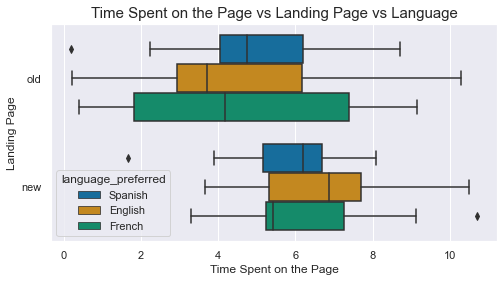

In [27]:
plt.figure(figsize=(8, 4))
sns.boxplot(data = df, 
            x = 'time_spent_on_the_page', 
            hue = 'language_preferred', 
            y = 'landing_page',
            palette = 'colorblind', 
           )
plt.title('Time Spent on the Page vs Landing Page vs Language', fontsize = 15)
plt.ylabel('Landing Page')
plt.xlabel('Time Spent on the Page')
plt.show()

**Observation:** The distribution of the variable Time Spent on the Page shows more variability between language categories when we separate the groups of users of the new vs the old page. In fact, English-preferring users show the biggest change in terms of time spent on the page. Also, times spent on the new page seem to show less variability. The representativity of the observations for the new page will be explored further in one of the statistical tests ahead.

#### Language Preferred vs Landing Page:

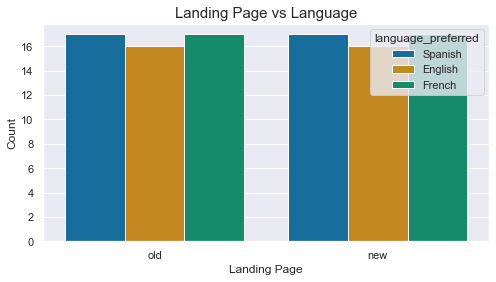

In [28]:
plt.figure(figsize=(8, 4))
sns.countplot(data = df, 
            x = 'landing_page', 
            hue = 'language_preferred', 
            palette = 'colorblind', 
           )
plt.title('Landing Page vs Language', fontsize = 15)
plt.ylabel('Count')
plt.xlabel('Landing Page')
plt.show()

**Observation:** Each group of users of the new and old page seem to have an almost equal distribution of language preference groups.

#### Language Preferred vs Converted status:

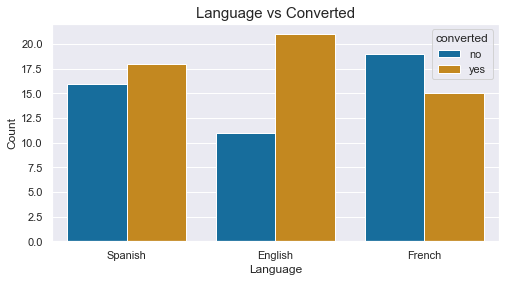

In [29]:
plt.figure(figsize=(8, 4))
sns.countplot(data = df, 
            x = 'language_preferred', 
            hue = 'converted', 
            palette = 'colorblind', 
           )
plt.title('Language vs Converted', fontsize = 15)
plt.ylabel('Count')
plt.xlabel('Language')
plt.show()

**Observation:** English-preferring users in this sample seem to have a higher number of converted users, followed by spanish-preferring users. French-preferring users seem to have the least conversion numbers, both in absolute and relative terms.

## 1. Do the users spend more time on the new landing page than the existing landing page?

From the question, given there's no information about parameters of the population, it might be necessary to undertake a **two independent sample t-test for equality of means**. The modality (equal or unequal std devs) will depend on the relationship between the variances of both samples.

### Perform Visual Analysis

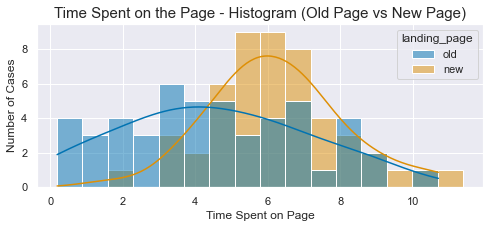

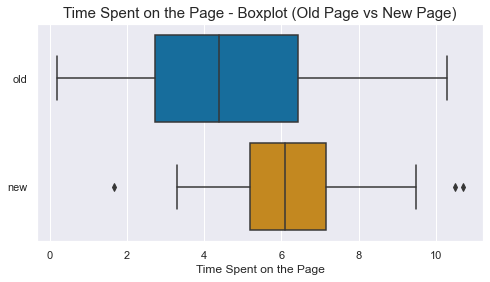

In [30]:
plt.figure(figsize=(8,3))
sns.histplot(data = df, 
             x = 'time_spent_on_the_page', 
             hue = 'landing_page',
             palette = 'colorblind', 
             binwidth = 0.7,
             kde = True)
plt.title('Time Spent on the Page - Histogram (Old Page vs New Page)', fontsize = 15)
plt.ylabel('Number of Cases')
plt.xlabel('Time Spent on Page')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(data = df, 
            x = 'time_spent_on_the_page', 
            y = 'landing_page',
            palette = 'colorblind', 
           )
plt.title('Time Spent on the Page - Boxplot (Old Page vs New Page)', fontsize = 15)
plt.ylabel('')
plt.xlabel('Time Spent on the Page')
plt.show()

In [31]:
df.groupby('landing_page')['time_spent_on_the_page'].describe().T # statistical summary for both old and new pages

landing_page,new,old
count,50.00,50.00
mean,6.22,4.53
std,1.82,2.58
min,1.65,0.19
25%,5.18,2.72
50%,6.11,4.38
75%,7.16,6.44
max,10.71,10.30


**Observation:** These visualizations, plus the statistical summary, allow for the observation that the distribution of time spent on the page, for old page and new page groups of the sample has a noticeable difference in mean time spent on the page, which needs to be submitted to a test if we are to infer the same relationship between the actual underlying populations.

### Step 1: Define the null and alternate hypotheses

The formulation of the question: "Do the users spend **more time** on the new landing page than the existing landing page" calls for a one-tailed test that compares the means of two samples. The null hypothesis will be assumed as the "status quo" situation, where both means are equal. The alternative hypothesis will answer the question: is the time spent (on average) on the new page higher? In other words:

$H_0$ : Time spent on both pages are equal, that is, $\mu_2 = \mu_1$

$H_a$ : Time spent on the new page is higher than on the old page, that is, $\mu_2 > \mu_1$

### Step 2: Select Appropriate test

Given that the populations variances are not known, and we are comparing the means o two samples, the test we need to execute is a two independent samples t-test for equality of means.

#### t-test assumptions checklist:

* The time spent on the page is measured on a continuous scale **<-check**
* Normally distributed populations **<-check** (see: Shapiro-Wilk test conducted before).
* Problem statement tells us that the sampling was random, and no relationship was reported between users, so it can be safely assumed that the users of the old and new pages represent independent populations. **<-check**
* Problem statement tells us that the sampling from the population was random **<-check**

The only pending check is on the standard deviations (to determine if the t-test modality is of equal standard deviations, or unequal standard deviations. Can they be assumed to be equal, given that in the former statistical summary they don't look similar?

In [32]:
# data arrays for both groups to tidy up the code
time_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']
time_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

In [33]:
round(time_old.std() / time_new.std(), 2) # factor between both samples' standard deviations

1.42

Both standard deviations look quite different, with a 42% difference between them. We will apply a Levene test (at a 5% significance level) to check if they are significantly different, that is:

$H_0$: The variances of the old page group and the new page group are equal.

$H_a$: The variances of the old page group and the new page group are not equal.

In [34]:
# Levene test
stat, p = stats.levene (time_old, time_new)
print ('Levene\'s test results:')
h_0_rej(p, alpha)

Levene's test results:
P-value = 0.008950671168914445
Significance level = 0.05
The p-value is less than the significance level.
Consequently, the null hypothesis is rejected.


**Conclusion:** There's evidence to assume that the variances are unequal, so the t-test has to be run under the unequal standard deviations modality.

**The assumptions are all met for a Two independent sample with unequal standard variances t-test**.

### Step 3: Decide the significance level

The significance level ($\alpha$) was defined in the problem statement as 5% (0.05). There's no reason to change it for this test.

### Step 4: Collect and prepare data

This step was during the selection of the test and assumption checking, for convenience and readability of the code.

### Step 5: Calculate the p-value

In [35]:
# two independent sample t-test for equality of means, unequal standard deviations
stat_1, p_val_1 = stats.stats.ttest_ind(time_new, time_old, equal_var = False, alternative = 'greater')
print(f'The p-value is: {p_val_1}')

The p-value is: 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [36]:
# auxiliary function call for the comparison of p-val vs alpha and printing of the test result
print ('Two independent samples t-test results:')
h_0_rej(p_val_1, alpha)

Two independent samples t-test results:
P-value = 0.0001392381225166549
Significance level = 0.05
The p-value is less than the significance level.
Consequently, the null hypothesis is rejected.


### Step 7:  Draw inference

The test results allow for the rejection of the null hypothesis. In conclusion, we have enough statistical evidence to support the claim that users spend more time on the new landing page than on the old page.

**A similar approach will be followed to answer the other questions, but the steps will be more streamlined.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

From the question it can be preliminarily deducted that we might need to undertake a **Z-test for 2 proportions**.

### Preliminary Analysis

In [37]:
df.groupby(['landing_page', 'converted'])['user_id'].count() # exploration of quantities to be worked upon

landing_page  converted
new           no           17
              yes          33
old           no           29
              yes          21
Name: user_id, dtype: int64

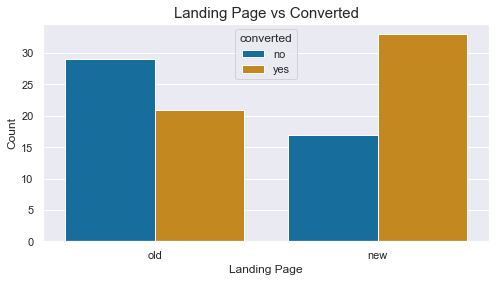

In [38]:
# recap of bivariate analysis already shown
plt.figure(figsize=(8, 4))
sns.countplot(data = df, 
            x = 'landing_page', 
            hue = 'converted', 
            palette = 'colorblind', 
            )
plt.title('Landing Page vs Converted', fontsize = 15)
plt.ylabel('Count')
plt.xlabel('Landing Page')
plt.show()

**Observation:** This visualization allows for the observation that the proportion of converted users among the new page sample is higher than for the old page sample. The significance of this difference will have to be tested according to the following Hypotheses.

### Hypotheses Definition

The formulation of the question: "Is the conversion rate (...) for the new page **greater** than the conversion rate for the old page" calls for a one-tailed test that compares two proportions. The null hypothesis will be assumed as the "status quo" situation, where both conversion rates ($p_1$ and $p_2$) are equal. The alternative hypothesis will answer the question: Is the conversion rate for the new page users ($p_2$) higher than the conversion rate for the old page users ($p_1$)? In other words:

$H_0$ : The proportions, or conversion rates, for both groups are equal, that is, $p_2 = p_1$

$H_a$ : The conversion rate for the new page group is greater than for the old page group, that is, $p_2 > p_1$

### Data Preparation

In the first place, the variables for the test construction are defined:

In [39]:
n_new = df[df['landing_page'] == 'new'].shape[0] # size of the new page group
n_old = df[df['landing_page'] == 'old'].shape[0] # size of the old page group

n_new_conv = df[(df['landing_page'] == 'new') & (df['converted'] == 'yes')].shape[0] # q of converted users from the new page group
n_old_conv = df[(df['landing_page'] == 'old') & (df['converted'] == 'yes')].shape[0] # q of converted users from the old page group

### Test Selection and Assumption Checking

The question states we need to compare two proportions, for which the **Z-test of two proportions** is the only alternative available in this context.

Assumptions for the **Z-test of two proportions**:
* Binomially distributed populations: each "test" can return only 2 results: converted (yes) or not converted (no) **<- check**
* No relationship was reported between users, so it can be safely assumed that the users of the old and new pages, converted or not, represent independent populations. **<-check**
* Problem statement tells us that the sampling from the population was random **<-check**
* The following code cell contains a check-up formula to verify if the conditions are met to assume that the distribution can be assumed as normal:

In [40]:
# checking assumptions: n * p >= 10 for each sample, in other words: number of 'success' cases >= 10 for each sample:
(n_new_conv >= 10) and (n_old_conv >= 10)

True

In conclusion, **all assumptions needed to utilize the Z-test for two proportions are met**.

### Significance Level:
The significance level ($\alpha$) was defined in the problem statement as 5% (0.05). There's no reason to change it for this test.

### Test construction, p-value calculation, and test result

In [41]:
# counts of converted for each sample ('successes')
count = np.array([n_new_conv, n_old_conv])

# sample sizes
n_obs = np.array([n_new, n_old])

# z-test for 2 proportions
stat_2, p_value_2 = proportion.proportions_ztest(count, n_obs, alternative = 'larger')

In [42]:
# checking if the p_value is is less than the significance level
print ('Two proportions Z-test results:')
h_0_rej(p_value_2, alpha)

Two proportions Z-test results:
P-value = 0.008026308204056278
Significance level = 0.05
The p-value is less than the significance level.
Consequently, the null hypothesis is rejected.


### Inference:

The test results allow for the rejection of the null hypothesis. In conclusion, we have enough statistical evidence to support the claim that the conversion rate for new page users is greater than for old page users.

## 3. Is the conversion and preferred language are independent or related?

Since this question pertains checking whether two categorical variables are related, a **chi-square test for independence** is called for.

### Preliminary Analysis

The chi-squared test for independence requires the construction of a contingency table:

In [43]:
# crosstab for contingency table preliminary inspection
pd.crosstab(df['converted'],df['language_preferred'],margins=True)

language_preferred,English,French,Spanish,All
converted,,,,
no,11,19,16,46
yes,21,15,18,54
All,32,34,34,100


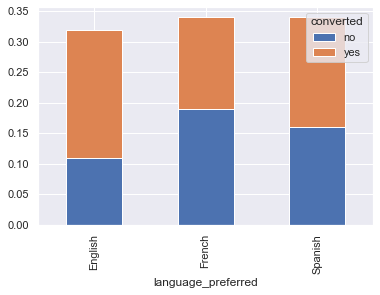

In [44]:
# visual analysis of the contingency table
pd.crosstab(df['language_preferred'], df['converted'], normalize=True).plot(kind='bar',stacked=True);

**Observation:** From the observation of the former visualizations and table, the conversion rate for english-preferring users seems the highest, followed by spanish-preferring users' conversion rates. The subsequent test could allow to extend the observed relationship between samples, to the underlying population.

### Hypothesis Definition

The formulation of the question: "(are) ... conversion and preferred language (...) independent or related?" calls for a test of independence. The null hypothesis will be assumed as the "status quo" situation, where both categorical variables are independent. The alternative hypothesis will postulate that both variables are dependent. In other words:

$H_0$ : Conversion is independent of Preferred Language.

$H_a$ : Conversion and Preferred Language are dependent.

Notice that out of mere common sense, we could conclude that conversion should be the dependent variable if the null hypothesis is rejected, but this consideration is not needed to execute the test. Also, this test won't determine causality between the variables.

### Significance Level:
The significance level ($\alpha$) was defined in the problem statement as 5% (0.05). There's no reason to change it for this test.

### Data Preparation (contingency table)

In [45]:
# clean contingency table as input for the chi-square contingency test
cont_table = pd.crosstab(df['converted'],df['language_preferred'])
cont_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Test construction, p-value calculation, and test result

In [46]:
# chi square test of independence
chi, p_value_3, dof, expected = stats.chi2_contingency(cont_table)
print ('Chi-squared Independence test results:')
h_0_rej(p_value_3, alpha)

Chi-squared Independence test results:
P-value = 0.21298887487543447
Significance level = 0.05
The p-value is not less than the significance level.
Consequently, the null hypothesis is not rejected.


### Inference:

Unexpectedly, the test results indicate there's **not enough evidence to reject the null hypothesis**, that is, the affirmation that the number of converted users is dependent on their language preferrence is not supported.

But is it because of lack of data? **Just as a sensitivity analysis**, we could repeat the test doubling the data quantities proportionally (see **Appendix**).

## 4. Is the time spent on the new page same for the different language users?

Since the question requires comparing the means of more than 2 samples (3 in this case), the best suited test to answer it is the **One-way ANOVA F-test for Analysis of Variance** (ANOVA test from now onwards).

### Preliminary Analysis

Since the question is about the behavior of subsets of the sample exclusively for the new landing page group, it's necessary to analyze the latter subset of data:

In [47]:
# subset for the new landing page data
df_new = df[df['landing_page'] == 'new']
df_new.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


#### Visual Analysis

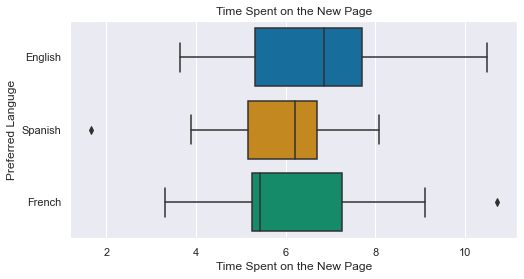

In [48]:
plt.figure(figsize=(8, 4))
sns.boxplot(data = df_new, 
            x = 'time_spent_on_the_page', 
            y = 'language_preferred', 
            palette = 'colorblind', 
           )
plt.title('Time Spent on the New Page')
plt.ylabel('Preferred Languge')
plt.xlabel('Time Spent on the New Page')
plt.show()

**Observation**: As it could be observed in the multivariate analysis of the EDA, if we consider only the group of users of the new landing page, there's an observable difference between the different language groups of the sample in their time spent on the page (while for both pages combined, the difference is almost negligible). The goal of this test is to determine if this difference is significant enough to infer a difference between the underlying populations' corresponding parameter.

### Hypothesis Definition

The formulation of the question: "Is the time spent on the new page same for the different language users?", given that there are three groups of different language users, calls for an **ANOVA test**. The null hypothesis will be assumed as the "status quo" situation, where the means for each group are equal. The alternative hypothesis will postulate that at least one of the group's means is different from the others. In other words:

$H_0$ : The average time spent on the new page is the same for every language group, that is: $\mu_1 = \mu_2 = \mu_3$

$H_a$ : At least one of the language groups presents a different average time spent on the new page.

### Data Preparation

In [49]:
# setting up data (for the Levene and the ANOVA test)
time_new_spa = df_new[df_new['language_preferred'] == 'Spanish']['time_spent_on_the_page']
time_new_eng = df_new[df_new['language_preferred'] == 'English']['time_spent_on_the_page']
time_new_fre = df_new[df_new['language_preferred'] == 'French']['time_spent_on_the_page']

### Test Selection and Assumption Checking

The test best suited to answer the stated question is the **ANOVA test**.

Assumptions for the **ANOVA test**:

* The populations are normally distributed.
    * Visual analysis:

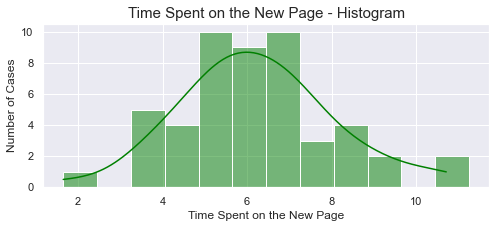

In [50]:
plt.figure(figsize=(8,3))
sns.histplot(data = df_new, 
             x = 'time_spent_on_the_page', 
             color = 'green', 
             binwidth = .8,
             kde = True)
plt.title('Time Spent on the New Page - Histogram', fontsize = 15)
plt.ylabel('Number of Cases')
plt.xlabel('Time Spent on the New Page')
plt.show()

**Observation**: The distribution of time spent on the new page looks symmetrical. To check if normality in its distribution can me assumed, a Shapiro-Wilk's test (at a 5% significance level) is called for. For this test, the null and alternative hypotheses are:

$H_0$: the data is normally distributed.

$H_a$: the data is not normally distributed.

In [51]:
# Shapiro-Wilk test
stat, p = stats.shapiro(df_new['time_spent_on_the_page'])
print ('Shapiro-Wilk\'s test results:')
h_0_rej(p, alpha)

Shapiro-Wilk's test results:
P-value = 0.8040016293525696
Significance level = 0.05
The p-value is not less than the significance level.
Consequently, the null hypothesis is not rejected.


Thus, the first assumption is met.

* Second assumption: population variances are homogeneous. To check is this assumption is met, a Levene test (at a 5% significance level) is called for. The test hypotheses are:

$H_0$: The population variances are equal

$H_a$: At least one variance is different from the rest

In [52]:
# Levene test
stat, p = stats.levene (time_new_spa, time_new_eng, time_new_fre)
print ('Levene\'s test results:')
h_0_rej(p, alpha)

Levene's test results:
P-value = 0.46711357711340173
Significance level = 0.05
The p-value is not less than the significance level.
Consequently, the null hypothesis is not rejected.


Given the former tests results, the following assumptions are met:
* Population is normally distributed **<- check**
* Variances are homogeneous **<- check**
* Also, the sampling was random, and no relationship was reported between users, so the populations can be assumed to be independent. **<- check**

**In conclusion, all the assumptions needed for the application of the ANOVA test are met.**

### Significance Level:
The significance level ($\alpha$) was defined in the problem statement as 5% (0.05). There's no reason to change it for this test.

### Test construction, p-value calculation, and test result

In [53]:
# One-way ANOVA Test
stat_4, p_val_4 = stats.f_oneway(time_new_spa, time_new_eng, time_new_fre)
print ('ANOVA test results:')
h_0_rej(p_val_4, alpha)

ANOVA test results:
P-value = 0.43204138694325955
Significance level = 0.05
The p-value is not less than the significance level.
Consequently, the null hypothesis is not rejected.


### Inference

The test results indicate there's **not enough evidence to reject the null hypothesis**. This means that, given the characteristics of the sample, it cannot be inferred that the populations of different language groups differ in their mean time spent on the new page.

## Conclusion and Business Recommendations

* Evidence shows that time spent on the new page is greater than on the old page, which could point to the users perceiving a better experience with the interface, visual attractiveness and/or content appeal. This effect is related to users' engagement and potentially or indirectly related to E-News Express revenue.
* Also, there’s enough evidence to affirm that the new page is related to a higher rate of conversion. This point is especially important as it drives metrics directly related to E-News Express revenues.
* Consequently, the recommendation is to favor and reinforce the new page design and keep making incremental improvements over it to avoid experiencing a decline in engagement in the future.
* There’s not enough statistical evidence to affirm that language preference plays a role in time spent on the new page or conversion rates. However, the data hints at such a relationship. More data is called for to keep an eye on these relationships in the future.


* Further investigation is called for in some respects, for example:
    * other parameters (cultural for example) influencing the apparent (but not proven) relationship between language groups and different variables.
    * other engagement metrics related to revenue, like clicks on sponsored links and/or banners is needed.
    * Segmentation of the research data by type of content delivered (politics, economy & finance, sports, showbiz, arts, etc.)

___

### Appendix:

Sensitivity analysis regarding question 3.

In [54]:
# chi square test of independence, sensitivity analysis
chi, p_value_3_s, dof, expected = stats.chi2_contingency(cont_table * 2)
print ('Chi-squared Independence test results (sensitivity analysis):')
h_0_rej(p_value_3_s, alpha)

Chi-squared Independence test results (sensitivity analysis):
P-value = 0.04536426082070349
Significance level = 0.05
The p-value is less than the significance level.
Consequently, the null hypothesis is rejected.


As can be seen, given enough data (at least 2 x the data set, assuming proportions keep constant), the dependency relationship between these variables could be supported (just not with the available data).